# Results inspection notebook
- This notebook loads the experiment `args.json`, `pre-train.pkl`, `post-train.pkl`, and optionally `compression.pkl`.

In [36]:

import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import jsonschema
import pytest

sns.set(style='whitegrid')
%matplotlib inline

In [37]:
results_dir = Path('Results/data/singleshot/cifar_rand_comp1_post100')
args_path = results_dir / 'args.json'
print('Loading config from', args_path)
with open(args_path, 'r') as f:
    cfg = json.load(f)

cfg

Loading config from Results/data/singleshot/cifar_rand_comp1_post100/args.json


{'compression': 1.0,
 'compression_list': [],
 'compression_schedule': 'exponential',
 'dataset': 'cifar10',
 'dense_classifier': False,
 'experiment': 'singleshot',
 'expid': 'cifar_rand_comp1_post100',
 'gpu': 0,
 'invert': False,
 'level_list': [],
 'lr': 0.001,
 'lr_drop_rate': 0.1,
 'lr_drops': [],
 'mask_scope': 'global',
 'model': 'resnet20',
 'model_class': 'lottery',
 'no_cuda': False,
 'optimizer': 'adam',
 'post_epochs': 100,
 'pre_epochs': 0,
 'pretrained': False,
 'prune_batch_size': 256,
 'prune_batchnorm': False,
 'prune_bias': False,
 'prune_dataset_ratio': 10,
 'prune_epoch_list': [],
 'prune_epochs': 1,
 'prune_residual': False,
 'prune_train_mode': False,
 'pruner': 'rand',
 'pruner_list': [],
 'quantization': False,
 'reinitialize': False,
 'result_dir': 'Results/data/singleshot/cifar_rand_comp1_post100',
 'save': True,
 'save_trace': False,
 'seed': 1,
 'shuffle': False,
 'test_batch_size': 256,
 'train_batch_size': 256,
 'verbose': False,
 'weight_decay': 0.0,
 'w

Config just to sanity check. now lets looks at train and test stuff

In [38]:

pre_path = results_dir / 'pre-train.pkl'
post_path = results_dir / 'post-train.pkl'

pre = pd.read_pickle(pre_path)
post = pd.read_pickle(post_path)

print('Pre-train (first/last rows)')
display(pd.concat([pre.head(1), pre.tail(1)]))
print('\nPost-train (first/last rows)')
display(pd.concat([post.head(1), post.tail(1)]))

Pre-train (first/last rows)


,train_loss,test_loss,top1_accuracy,top5_accuracy,inference_time
0,NaN,58.017824,10.0,50.0,0.673103
0,NaN,58.017824,10.0,50.0,0.673103



Post-train (first/last rows)


,train_loss,test_loss,top1_accuracy,top5_accuracy,inference_time
0,NaN,2.303050,9.28,49.16,0.283805
100,0.447634,0.563461,81.73,99.14,0.271465


In [40]:
results_root = Path('Results/data/singleshot/mnist_mag_comp1_post100')
post = results_root / 'post-train.pkl'
mnist_mag = pd.read_pickle(post)
mnist_mag.head()

,train_loss,test_loss,top1_accuracy,top5_accuracy,inference_time
0,NaN,2.413064,13.43,69.19,0.025267
1,0.270068,0.117736,96.93,99.69,0.033191
2,0.072154,0.103779,97.32,99.78,0.023646
3,0.053690,0.100384,97.45,99.75,0.024339
4,0.043021,0.099984,97.45,99.77,0.025333


In [63]:
df = pd.read_pickle('Results/data/singleshot/cifar_grasp_comp1_post100/compression.pkl')
df.head()

,module,param,sparsity,size,shape,flops,score mean,score variance,score sum,score abs mean,score abs variance,score abs sum,prunable
0,conv,weight,0.490741,432,"(16, 3, 3, 3)",442368,0.000204,1.038803e-06,0.088295,0.000578,7.461624e-07,0.249819,True
1,bn,weight,1.000000,16,"(16,)",16384,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,False
2,bn,bias,1.000000,16,"(16,)",16384,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,False
3,blocks.0.conv1,weight,0.215712,2304,"(16, 16, 3, 3)",2359296,0.000025,1.141690e-07,0.058191,0.000125,9.923667e-08,0.287495,True
4,blocks.0.bn1,weight,1.000000,16,"(16,)",16384,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,False


In [42]:
df = pd.read_pickle('Results/data/singleshot/mnist_rand_comp1_post100/pre-train.pkl')
df

,train_loss,test_loss,top1_accuracy,top5_accuracy,inference_time
0,NaN,2.306855,10.32,47.39,1.921588


,expid,final_top1,final_train_loss,n_epochs
1,mnist_mag_comp1_post100,97.68,3.111353e-08,101
2,mnist_snip_comp1_post100,96.66,6.650984e-03,101
4,mnist_grasp_comp1_post100,96.39,1.523982e-02,101
0,mnist_rand_comp1_post100,95.96,2.081826e-02,101
6,cifar_mag_comp1_post100,85.02,3.038874e-01,101
5,cifar_rand_comp1_post100,81.73,4.476343e-01,101
7,cifar_snip_comp1_post100,80.19,4.885971e-01,101
9,cifar_grasp_comp1_post100,79.21,5.045893e-01,101
8,cifar_synflow_comp1_post100,44.20,1.314787e+00,101
3,mnist_synflow_comp1_post100,11.35,2.301242e+00,101


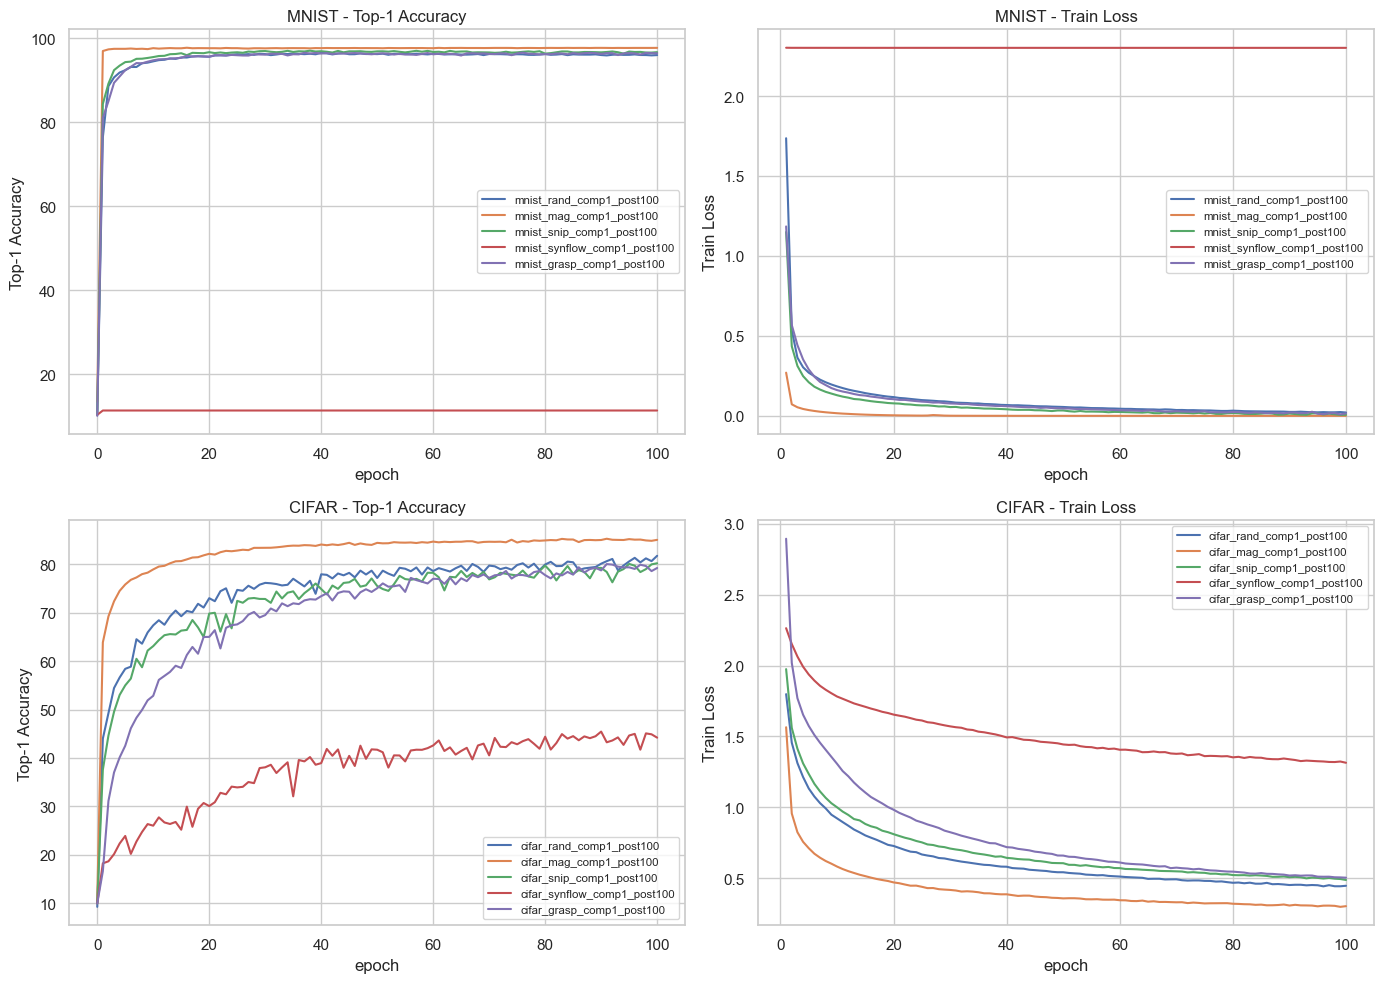

In [32]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# List the result directories you want to compare (edit as needed)
runs = [
    "Results/data/singleshot/mnist_rand_comp1_post100",
    "Results/data/singleshot/mnist_mag_comp1_post100",
    "Results/data/singleshot/mnist_snip_comp1_post100",
    "Results/data/singleshot/mnist_synflow_comp1_post100",
    "Results/data/singleshot/mnist_grasp_comp1_post100",
    "Results/data/singleshot/cifar_rand_comp1_post100",
    "Results/data/singleshot/cifar_mag_comp1_post100",
    "Results/data/singleshot/cifar_snip_comp1_post100",
    "Results/data/singleshot/cifar_synflow_comp1_post100",
    "Results/data/singleshot/cifar_grasp_comp1_post100",
]

mnist_paths = [Path(p) for p in runs if 'mnist' in p.lower()]
cifar_paths = [Path(p) for p in runs if 'cifar' in p.lower()]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
ax_mnist_top1, ax_mnist_loss = axes[0]
ax_cifar_top1, ax_cifar_loss = axes[1]

summary = []

def plot_list(paths, ax_top1, ax_loss):
    for p in paths:
        post = p / 'post-train.pkl'
        try:
            df = pd.read_pickle(post)
        except Exception as e:
            print(f'Warning: could not load {post}: {e}')
            continue
        label = p.name
        ax_top1.plot(df['top1_accuracy'].reset_index(drop=True), label=label)
        ax_loss.plot(df['train_loss'].reset_index(drop=True), label=label)
        summary.append({'expid': label, 'final_top1': float(df['top1_accuracy'].iloc[-1]), 'final_train_loss': float(df['train_loss'].iloc[-1]), 'n_epochs': len(df)})

# Plot MNIST and CIFAR
plot_list(mnist_paths, ax_mnist_top1, ax_mnist_loss)
plot_list(cifar_paths, ax_cifar_top1, ax_cifar_loss)

# Formatting
for ax in [ax_mnist_top1, ax_cifar_top1]:
    ax.set_ylabel('Top-1 Accuracy')
    ax.set_xlabel('epoch')
for ax in [ax_mnist_loss, ax_cifar_loss]:
    ax.set_ylabel('Train Loss')
    ax.set_xlabel('epoch')

ax_mnist_top1.set_title('MNIST - Top-1 Accuracy')
ax_mnist_loss.set_title('MNIST - Train Loss')
ax_cifar_top1.set_title('CIFAR - Top-1 Accuracy')
ax_cifar_loss.set_title('CIFAR - Train Loss')

for ax in axes.ravel():
    ax.legend(fontsize='x-small')

plt.tight_layout()

# Display a simple summary table
if summary:
    display(pd.DataFrame(summary).sort_values(['final_top1'], ascending=False))
else:
    print('No post-train.pkl files loaded from the listed paths.')

In [64]:
from pathlib import Path
import pandas as pd

# Define the result files and their labels (with corrected paths)
result_files = {
    "rand-100": "Results/data/singleshot/cifar_rand_comp1_post100",
    "mag-100": "Results/data/singleshot/cifar_mag_comp1_post100",
    "snip-100": "Results/data/singleshot/cifar_snip_comp1_post100",
    "grasp-100": "Results/data/singleshot/cifar_grasp_comp1_post100",
    "synflow-100": "Results/data/singleshot/cifar_synflow_comp1_post100",
    "rand-50": "Results/data/singleshot/cifar_rand_post100_comp050",
    "mag-50": "Results/data/singleshot/cifar_mag_post100_comp050",
    "snip-50": "Results/data/singleshot/cifar_snip_post100_comp050",
    "grasp-50": "Results/data/singleshot/cifar_grasp_post100_comp050",
    "synflow-50": "Results/data/singleshot/cifar_synflow_post100_comp050",
    "rand-25": "Results/data/singleshot/cifar_rand_post100_comp025",
    "mag-25": "Results/data/singleshot/cifar_mag_post100_comp025",
    "snip-25": "Results/data/singleshot/cifar_snip_post100_comp025",
    "grasp-25": "Results/data/singleshot/cifar_grasp_post100_comp025",
    "synflow-25": "Results/data/singleshot/cifar_synflow_post100_comp025",
}

# Extract top-1 accuracy, inference time, and total flops for each
results = {}
for label, path in result_files.items():
    post_path = Path(path) / 'post-train.pkl'
    comp_path = Path(path) / 'compression.pkl'
    try:
        # Read post-train data
        df_post = pd.read_pickle(post_path)
        final_row = df_post.iloc[-1]
        test_top1_accuracy = final_row['top1_accuracy']
        inference_time = final_row['inference_time']
        
        # Read compression data and calculate FLOPs
        # Calculate: flops * sparsity for prunable layers
        df_comp = pd.read_pickle(comp_path)
        df_prunable = df_comp[df_comp['prunable']].copy()
        df_prunable['actual_flops'] = df_prunable['flops'] * df_prunable['sparsity']
        total_flops = df_prunable['actual_flops'].sum()
        
        results[label] = (test_top1_accuracy, inference_time, total_flops)
        print(f"{label}: Top-1 Acc = {test_top1_accuracy:.2f}%, Time = {inference_time:.4f}s, FLOPs = {total_flops:,.0f}")
    except Exception as e:
        print(f"Error loading {label} from {path}: {e}")
        results[label] = (None, None, None)

print("\nResults dictionary:")
print(results)

rand-100: Top-1 Acc = 81.73%, Time = 0.2715s, FLOPs = 3,955,143
mag-100: Top-1 Acc = 85.02%, Time = 0.2252s, FLOPs = 4,531,278
snip-100: Top-1 Acc = 80.19%, Time = 0.1800s, FLOPs = 6,520,767
grasp-100: Top-1 Acc = 79.21%, Time = 0.1982s, FLOPs = 5,864,538
synflow-100: Top-1 Acc = 44.20%, Time = 0.1794s, FLOPs = 15,290,073
rand-50: Top-1 Acc = 84.60%, Time = 0.2110s, FLOPs = 12,774,993
mag-50: Top-1 Acc = 88.14%, Time = 0.1963s, FLOPs = 13,466,235
snip-50: Top-1 Acc = 85.09%, Time = 0.1670s, FLOPs = 15,884,286
grasp-50: Top-1 Acc = 84.58%, Time = 0.1797s, FLOPs = 14,202,177
synflow-50: Top-1 Acc = 86.35%, Time = 0.2172s, FLOPs = 25,214,127
rand-25: Top-1 Acc = 86.17%, Time = 0.2314s, FLOPs = 22,878,897
mag-25: Top-1 Acc = 88.76%, Time = 0.1940s, FLOPs = 23,359,962
snip-25: Top-1 Acc = 86.32%, Time = 0.1825s, FLOPs = 25,428,000
grasp-25: Top-1 Acc = 84.64%, Time = 0.1862s, FLOPs = 22,608,537
synflow-25: Top-1 Acc = 86.20%, Time = 0.2205s, FLOPs = 31,249,464

Results dictionary:
{'rand-10

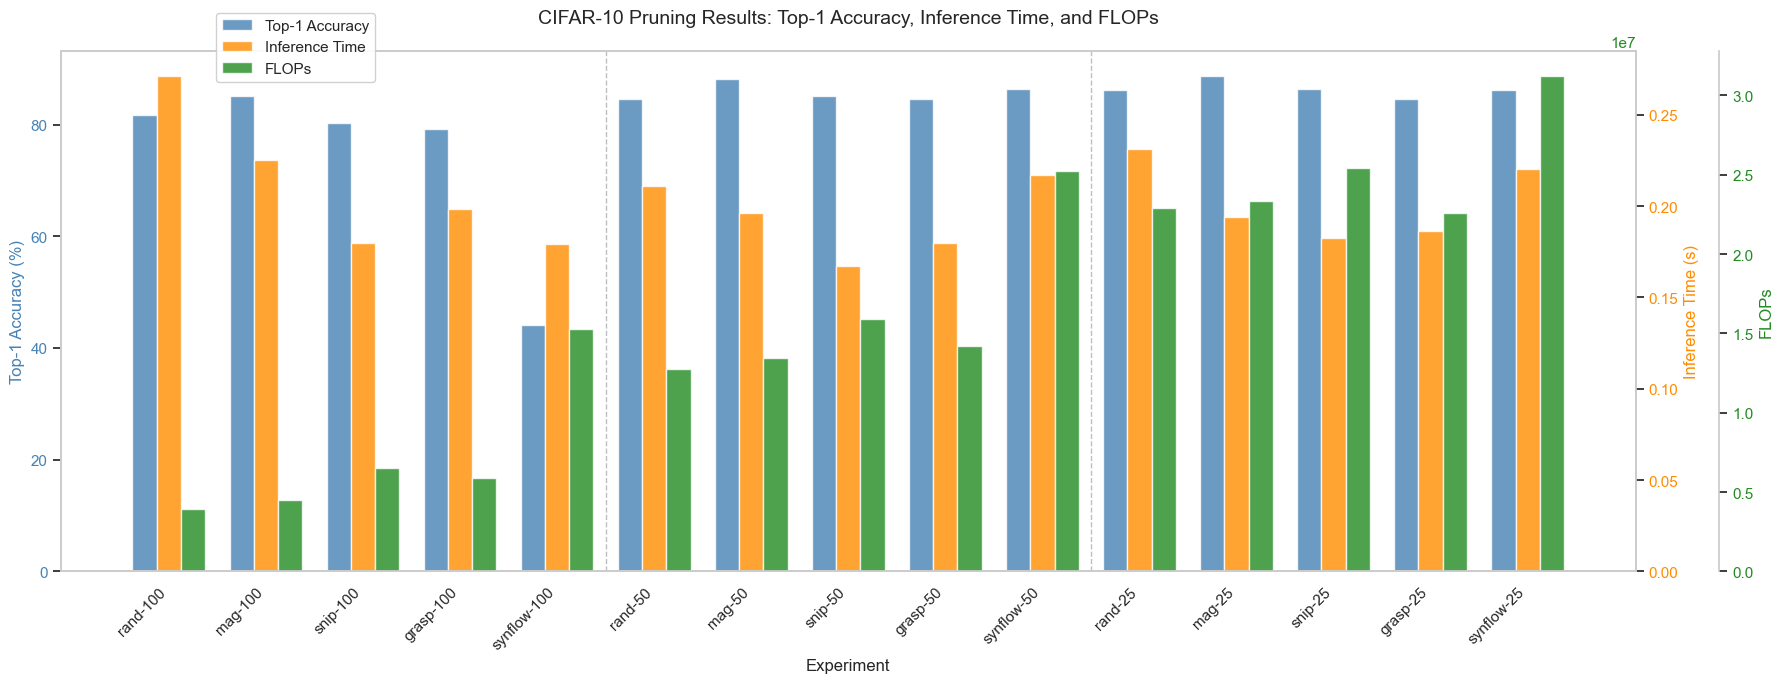

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Define the desired order: 100s, then 50s, then 25s
# Within each: rand, mag, snip, grasp, synflow
ordered_labels = [
    'rand-100', 'mag-100', 'snip-100', 'grasp-100', 'synflow-100',
    'rand-50', 'mag-50', 'snip-50', 'grasp-50', 'synflow-50',
    'rand-25', 'mag-25', 'snip-25', 'grasp-25', 'synflow-25',
]

# Prepare data for plotting in the specified order
accuracies = [results[label][0] if label in results and results[label][0] is not None else 0 for label in ordered_labels]
times = [results[label][1] if label in results and results[label][1] is not None else 0 for label in ordered_labels]
flops = [results[label][2] if label in results and results[label][2] is not None else 0 for label in ordered_labels]

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(18, 7))

# Set up x-axis positions
x = np.arange(len(ordered_labels))
width = 0.25

# Plot accuracy bars on first y-axis
color1 = 'steelblue'
bars1 = ax1.bar(x - width, accuracies, width, label='Top-1 Accuracy', color=color1, alpha=0.8)
ax1.set_xlabel('Experiment', fontsize=12)
ax1.set_ylabel('Top-1 Accuracy (%)', color=color1, fontsize=12)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(x)
ax1.set_xticklabels(ordered_labels, rotation=45, ha='right')

# Turn off grid
ax1.grid(False)

# Add vertical lines to separate compression levels
ax1.axvline(x=4.5, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax1.axvline(x=9.5, color='gray', linestyle='--', linewidth=1, alpha=0.5)

# Create second y-axis for inference time
ax2 = ax1.twinx()
color2 = 'darkorange'
bars2 = ax2.bar(x, times, width, label='Inference Time', color=color2, alpha=0.8)
ax2.set_ylabel('Inference Time (s)', color=color2, fontsize=12)
ax2.tick_params(axis='y', labelcolor=color2)

# Create third y-axis for FLOPs
ax3 = ax1.twinx()
# Offset the third axis to the right
ax3.spines['right'].set_position(('outward', 60))
color3 = 'forestgreen'
bars3 = ax3.bar(x + width, flops, width, label='FLOPs', color=color3, alpha=0.8)
ax3.set_ylabel('FLOPs', color=color3, fontsize=12)
ax3.tick_params(axis='y', labelcolor=color3)
for ax in [ax1, ax2, ax3]:
    ax.grid(alpha=0)


# Format FLOPs axis with scientific notation
ax3.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# Add title and legends
plt.title('CIFAR-10 Pruning Results: Top-1 Accuracy, Inference Time, and FLOPs', fontsize=14, pad=20)
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.98), framealpha=0.9)

plt.tight_layout()
plt.show()